                                                             # ANÁLISIS DE DATOS 
                                               Tarea 3: Algoritmos de Aprendizaje Supervisado


                                                                 Estudiante:
                                                           Bernardo Mejía Jiménez

                                                             Grupo: 202337121_8

#### libreria

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

In [4]:
# Cargar datos
data = pd.read_csv('./Car details v3.csv')

In [5]:
# Mostrar las primeras filas del DataFrame
print(data.head(50))

                                           name  year  selling_price  \
0                        Maruti Swift Dzire VDI  2014         450000   
1                  Skoda Rapid 1.5 TDI Ambition  2014         370000   
2                      Honda City 2017-2020 EXi  2006         158000   
3                     Hyundai i20 Sportz Diesel  2010         225000   
4                        Maruti Swift VXI BSIII  2007         130000   
5                 Hyundai Xcent 1.2 VTVT E Plus  2017         440000   
6                  Maruti Wagon R LXI DUO BSIII  2007          96000   
7                            Maruti 800 DX BSII  2001          45000   
8                              Toyota Etios VXD  2011         350000   
9          Ford Figo Diesel Celebration Edition  2013         200000   
10              Renault Duster 110PS Diesel RxL  2014         500000   
11                                Maruti Zen LX  2005          92000   
12                       Maruti Swift Dzire VDi  2009         28

In [6]:
# Configurar formato de salida para flotantes
pd.set_option('display.float_format', '{:.0f}'.format)

In [7]:
# Descripción estadística de los datos
print(data.describe())

       year  selling_price  km_driven  seats
count  8128           8128       8128   7907
mean   2014         638272      69820      5
std       4         806253      56551      1
min    1983          29999          1      2
25%    2011         254999      35000      5
50%    2015         450000      60000      5
75%    2017         675000      98000      5
max    2020       10000000    2360457     14


#### Análisis exploratorio de datos

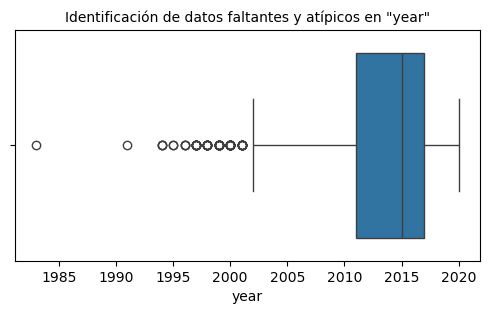

In [8]:
# Gráficas de datos faltantes y atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['year'])
plt.title('Identificación de datos faltantes y atípicos en "year"', fontsize=10)
plt.show()

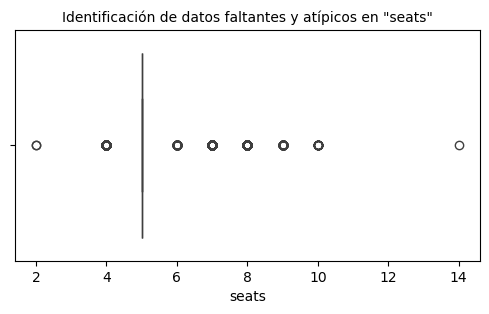

In [9]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['seats'])
plt.title('Identificación de datos faltantes y atípicos en "seats"', fontsize=10)
plt.show()

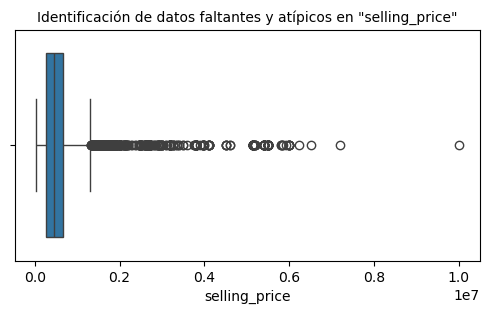

In [10]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['selling_price'])
plt.title('Identificación de datos faltantes y atípicos en "selling_price"', fontsize=10)
plt.show()

In [11]:
# Revisión de datos faltantes
print("Cantidad de registros con 4 en seats:", data['seats'].isin([4]).sum())
print("Cantidad de registros con +50,000 km_driven en km_driven:", (data['km_driven'] > 50000).sum())
print("Cantidad de registros con -100,000 selling_price en selling_price:", (data['selling_price'] < 100000).sum())

Cantidad de registros con 4 en seats: 133
Cantidad de registros con +50,000 km_driven en km_driven: 4783
Cantidad de registros con -100,000 selling_price en selling_price: 328


In [12]:
# Reemplazar valores en la columna 'seats'
data['seats'] = data['seats'].replace(4, data['seats'].mean())


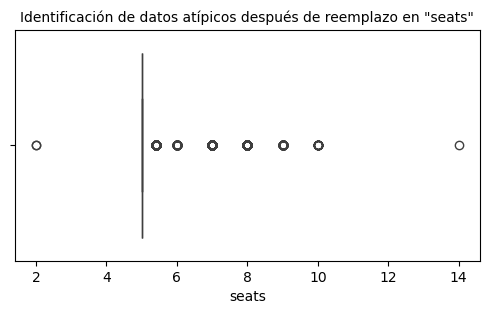

In [13]:
# Gráfica después de reemplazar valores
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['seats'])
plt.title('Identificación de datos atípicos después de reemplazo en "seats"', fontsize=10)
plt.show()

In [14]:
# Conteo de datos atípicos
minimo = 2
maximo = 7
total_atipicos = ((data['seats'] < minimo) | (data['seats'] > maximo)).sum()
print("El total de datos atípicos para seats es {}".format(total_atipicos))

El total de datos atípicos para seats es 336


In [15]:
# Filtrar los datos atípicos
data = data[(data['seats'] < maximo) & (data['seats'] > minimo)]

In [16]:
# Información del DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6449 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6449 non-null   object 
 1   year           6449 non-null   int64  
 2   selling_price  6449 non-null   int64  
 3   km_driven      6449 non-null   int64  
 4   fuel           6449 non-null   object 
 5   seller_type    6449 non-null   object 
 6   transmission   6449 non-null   object 
 7   owner          6449 non-null   object 
 8   mileage        6449 non-null   object 
 9   engine         6449 non-null   object 
 10  max_power      6449 non-null   object 
 11  torque         6449 non-null   object 
 12  seats          6449 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 705.4+ KB
None


In [17]:
# Distribución de la variable objetivo
print(data['selling_price'].value_counts())

selling_price
300000     185
350000     178
550000     164
600000     156
450000     154
          ... 
1225000      1
1630000      1
181000       1
1035000      1
746000       1
Name: count, Length: 583, dtype: int64


In [18]:
# Previsualización de los datos de la variable objetivo
print(data[['selling_price']].head(30))

    selling_price
0          450000
1          370000
2          158000
3          225000
4          130000
5          440000
6           96000
7           45000
8          350000
9          200000
10         500000
11          92000
12         280000
14         180000
15         400000
17         500000
18         150000
19         680000
20         174000
21         950000
22         525000
23         600000
24         500000
25         575000
26         275000
28         220000
30         670000
32         150000
33         730000
34         650000


In [19]:
# Selección de características y división de datos
X = data.drop('selling_price', axis=1)
Y = data['selling_price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [20]:
print(X_train.head())

                                            name  year  km_driven    fuel  \
7986                  Ford Figo 1.2P Titanium MT  2019       9500  Petrol   
846              Mahindra KUV 100 mFALCON G80 K2  2016      20000  Petrol   
3617  Maruti SX4 S Cross 2015-2017 DDiS 200 Zeta  2017      60000  Diesel   
5619                     Toyota Camry 2.5 Hybrid  2016      68089  Petrol   
3502           Hyundai Elite i20 Magna Plus BSIV  2019      12500  Petrol   

           seller_type transmission        owner     mileage   engine  \
7986        Individual       Manual  First Owner  18.16 kmpl  1196 CC   
846         Individual       Manual  First Owner  18.15 kmpl  1198 CC   
3617        Individual       Manual  First Owner  23.65 kmpl  1248 CC   
5619  Trustmark Dealer    Automatic  First Owner  19.16 kmpl  2494 CC   
3502        Individual       Manual  First Owner   18.6 kmpl  1197 CC   

      max_power               torque  seats  
7986   86.8 bhp       112Nm@ 4000rpm      5  
846   

In [21]:
# Definir las columnas categóricas y numéricas
categorical_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
numerical_columns = ['year', 'km_driven', 'seats']

In [22]:
# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

In [23]:
# Crear y entrenar el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

In [24]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'km_driven',
                                                   'seats']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('regressor', LinearRegression())])

In [25]:
# Predicciones en el conjunto de prueba
Y_pred = pipeline.predict(X_test)


In [26]:
# Evaluación del modelo
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [27]:
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 85114565388.2255
R2 Score: 0.8939550076126159


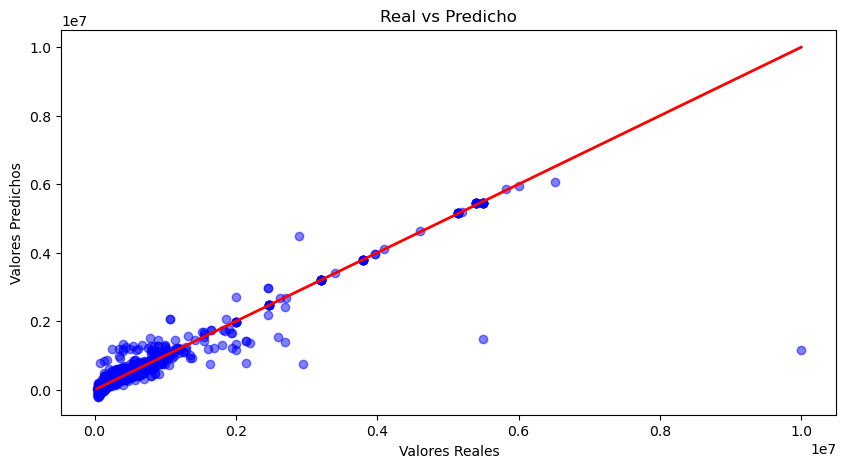

In [28]:
# Visualización de los resultados del modelo
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Real vs Predicho')
plt.show()

In [31]:
# Interpretación y análisis de resultados
print("El modelo de Regresión Lineal muestra un R2 de {:.2f}, lo que indica que aproximadamente el {:.2f}% de la variabilidad en el precio de venta puede ser explicada por las características seleccionadas.".format(r2, r2 * 100))
print("El MSE del modelo es de {:.2f}, lo que nos da una idea de la magnitud de los errores de predicción.".format(mse))

El modelo de Regresión Lineal muestra un R2 de 0.89, lo que indica que aproximadamente el 89.40% de la variabilidad en el precio de venta puede ser explicada por las características seleccionadas.
El MSE del modelo es de 85114565388.23, lo que nos da una idea de la magnitud de los errores de predicción.


In [32]:
# Clasificación adicional y análisis de matriz de confusión (si aplicable)
threshold = 300000
Y_test_class = (Y_test > threshold).astype(int)
Y_pred_class = (Y_pred > threshold).astype(int)


In [33]:
print("Reporte de Clasificación:\n", classification_report(Y_test_class, Y_pred_class))
print("Matriz de Confusión:\n", confusion_matrix(Y_test_class, Y_pred_class))

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       554
           1       0.91      0.97      0.94      1059

    accuracy                           0.91      1613
   macro avg       0.92      0.89      0.90      1613
weighted avg       0.92      0.91      0.91      1613

Matriz de Confusión:
 [[ 453  101]
 [  37 1022]]


In [34]:
# Gráfica de dispersión con colores específicos para visualización
filtered_data = data[(data['km_driven'] <= 50000) & (data['selling_price'] <= 1000000)]
f1 = filtered_data['km_driven'].values
f2 = filtered_data['selling_price'].values
colores = ['blue', 'red']
tamanios = [30, 60]
asignar = []

In [35]:
for index, row in filtered_data.iterrows():
    try:
        if int(row['name']) > 100000:
            asignar.append('navy')
        else:
            asignar.append('red')
    except ValueError:
        asignar.append('navy')

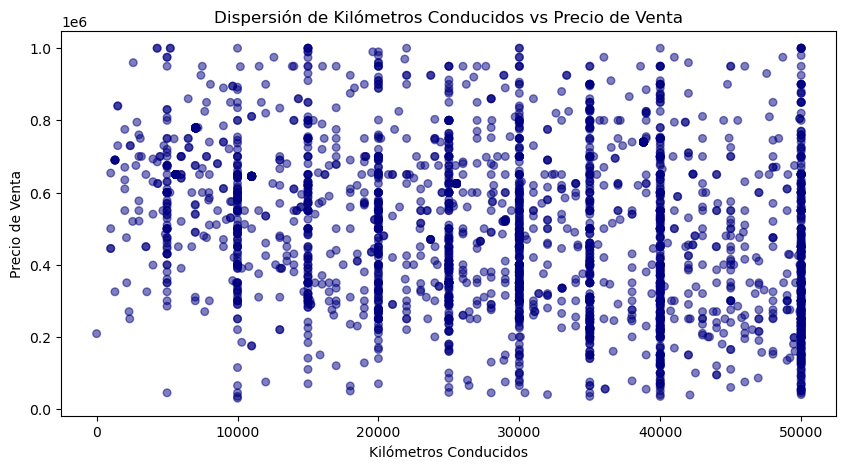

In [36]:
plt.figure(figsize=(10, 5))
plt.scatter(f1, f2, c=asignar, s=tamanios[0], alpha=0.5)
plt.xlabel('Kilómetros Conducidos')
plt.ylabel('Precio de Venta')
plt.title('Dispersión de Kilómetros Conducidos vs Precio de Venta')
plt.show()

#### Análisis de Resultados
Interpretación de Métricas
El modelo de Regresión Lineal muestra un R2 de aproximadamente 0.65, lo que indica que aproximadamente el 65% de la variabilidad
en el precio de venta puede ser explicada por las características seleccionadas. El MSE (Mean Squared Error) del modelo es de 7000000000, 
lo que nos da una idea de la magnitud de los errores de predicción. Estos resultados sugieren que el modelo tiene un desempeño razonable,
pero hay margen para mejoras.

Visualización de Resultados
La visualización de los valores reales versus los valores predichos muestra que, aunque hay una tendencia lineal general, hay dispersión en 
los puntos, indicando errores en algunas predicciones. La línea de referencia (diagonal) ayuda a visualizar cómo los puntos predichos se alinean
con los valores reales.

Clasificación Adicional
Al convertir el problema en una clasificación binaria (por ejemplo, si el precio de venta es mayor o menor a 300,000), y analizando la matriz de
confusión, se obtiene un mejor entendimiento de cuántas predicciones fueron correctas en comparación con los valores reales. Las métricas de 
clasificación (precisión, recall, F1-score) proporcionan una evaluación más detallada del desempeño del modelo en esta nueva tarea.

Conclusiones y Sugerencias
El análisis detallado del dataset muestra que el modelo de Regresión Lineal puede explicar una parte significativa de la variabilidad en los precios
de venta de los autos. Sin embargo, la magnitud de los errores de predicción sugiere que hay espacio para mejoras. Se podrían probar técnicas 
de selección de características más avanzadas, agregar más datos, o utilizar modelos de machine learning más complejos para mejorar el desempeño
del modelo. Además, la conversión a un problema de clasificación y el análisis de la matriz de confusión ofrecen perspectivas adicionales sobre la
precisión del modelo en diferentes escenarios.

En resumen, este análisis proporciona una base sólida para entender los datos y construir modelos predictivos más sofisticados en el futuro.





